<a href="https://colab.research.google.com/github/Tejav202/IETE_SUMMER_INTERNSHIP_2025/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
!pip install reviews

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from reviews import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.0/110.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.4/134.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 29.2 MB/s eta 0:00:00
  Attempting uninstall: markdown-it-py
    Found existing installation: markdown-it-py 3.0.0
    Uninstalling markdown-it-py-3.0.0:
      Successfully uninstalled markdown-it-py-3.0.0
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
 

In [4]:
df=pd.read_csv("/content/sentiment_data.csv")

In [ ]:
df.head()

,Unnamed: 0,Comment,Sentiment
0,0,lets forget apple pay required brand new iphon...,1.0
1,1,nz retailers don’t even contactless credit car...,0.0
2,2,forever acknowledge channel help lessons ideas...,2.0
3,3,whenever go place doesn’t take apple pay doesn...,0.0
4,4,apple pay convenient secure easy use used kore...,2.0


In [5]:
df.tail()

,Unnamed: 0,Comment,Sentiment
241140,241921,crores paid neerav modi recovered congress lea...,0
241141,241922,dear rss terrorist payal gawar modi killing pl...,0
241142,241923,cover interaction forum left,1
241143,241924,big project came india modi dream project happ...,1
241144,241925,ever listen like gurukul discipline maintained...,2


In [6]:
df.describe()

,Unnamed: 0,Sentiment
count,241145.000000,241145.000000
mean,121289.252479,1.198822
std,69709.762092,0.785110
min,0.000000,0.000000
25%,61063.000000,1.000000
50%,121350.000000,1.000000
75%,181636.000000,2.000000
max,241925.000000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241145 entries, 0 to 241144
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  241145 non-null  int64 
 1   Comment     240928 non-null  object
 2   Sentiment   241145 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.5+ MB


In [8]:
print(df.dtypes)

Unnamed: 0     int64
Comment       object
Sentiment      int64
dtype: object


In [9]:
print(df.isnull().sum())

Unnamed: 0      0
Comment       217
Sentiment       0
dtype: int64


In [11]:

df['Sentiment'] = pd.to_numeric(df['Sentiment'], errors='coerce')
df['Sentiment'] = df['Sentiment'].fillna(df['Sentiment'].mean())


In [15]:
df = df.dropna(subset=['Comment', 'Sentiment'])


In [16]:
print(df.isnull().sum())

Unnamed: 0    0
Comment       0
Sentiment     0
dtype: int64


In [17]:
df.drop_duplicates()

,Unnamed: 0,Comment,Sentiment
0,0,lets forget apple pay required brand new iphon...,1
1,1,nz retailers don’t even contactless credit car...,0
2,2,forever acknowledge channel help lessons ideas...,2
3,3,whenever go place doesn’t take apple pay doesn...,0
4,4,apple pay convenient secure easy use used kore...,2
...,...,...,...
241140,241921,crores paid neerav modi recovered congress lea...,0
241141,241922,dear rss terrorist payal gawar modi killing pl...,0
241142,241923,cover interaction forum left,1
241143,241924,big project came india modi dream project happ...,1


In [18]:
len(df)

240928

In [20]:
import pandas as pd

# Load the CSV
sentiment_df = pd.read_csv("sentiment_data.csv")

# Drop rows with missing comments
sentiment_df_clean = sentiment_df.dropna(subset=['Comment'])

# Filter and display top 5 positive sentiment comments (Sentiment = 2)
top_positive = sentiment_df_clean[sentiment_df_clean['Sentiment'] == 2].head(5)
print(top_positive[['Comment', 'Sentiment']])


                                              Comment  Sentiment
2   forever acknowledge channel help lessons ideas...          2
4   apple pay convenient secure easy use used kore...          2
6     got apple pay south africa it’s widely accepted          2
8   united states abundance retailers accept apple...          2
10  wow really went town psu test rack thats serio...          2


In [21]:
# Drop rows with missing comments first
sentiment_df_clean = sentiment_df.dropna(subset=['Comment'])

# Sort by Sentiment (lowest = negative)
top_five_negative = sentiment_df_clean.sort_values(by='Sentiment', ascending=True).head(5)
print(top_five_negative[['Comment', 'Sentiment']])


                                                  Comment  Sentiment
241140  crores paid neerav modi recovered congress lea...          0
241132  azamgarh please poor working requirement jogia...          0
14      holy crap looking chroma systems back designin...          0
3       whenever go place doesn’t take apple pay doesn...          0
1       nz retailers don’t even contactless credit car...          0


In [22]:
# Drop rows with missing comments
sentiment_df_clean = sentiment_df.dropna(subset=['Comment'])

# Sort by lowest sentiment value (0 = Negative)
least_five = sentiment_df_clean.sort_values(by='Sentiment', ascending=True).head(5)

# Show the results
print(least_five[['Comment', 'Sentiment']])


                                                  Comment  Sentiment
241140  crores paid neerav modi recovered congress lea...          0
241132  azamgarh please poor working requirement jogia...          0
14      holy crap looking chroma systems back designin...          0
3       whenever go place doesn’t take apple pay doesn...          0
1       nz retailers don’t even contactless credit car...          0


In [23]:
# Drop rows with missing comments
sentiment_df_clean = sentiment_df.dropna(subset=['Comment'])

# Sort by Sentiment in ascending order (0 = most negative)
least_five = sentiment_df_clean.sort_values(by='Sentiment', ascending=True).head(5)

# Show the results
print(least_five[['Comment', 'Sentiment']])


                                                  Comment  Sentiment
241140  crores paid neerav modi recovered congress lea...          0
241132  azamgarh please poor working requirement jogia...          0
14      holy crap looking chroma systems back designin...          0
3       whenever go place doesn’t take apple pay doesn...          0
1       nz retailers don’t even contactless credit car...          0


In [24]:
average_sentiment = sentiment_df['Sentiment'].mean()
print("Average Sentiment Score:", average_sentiment)


Average Sentiment Score: 1.1988222853469903


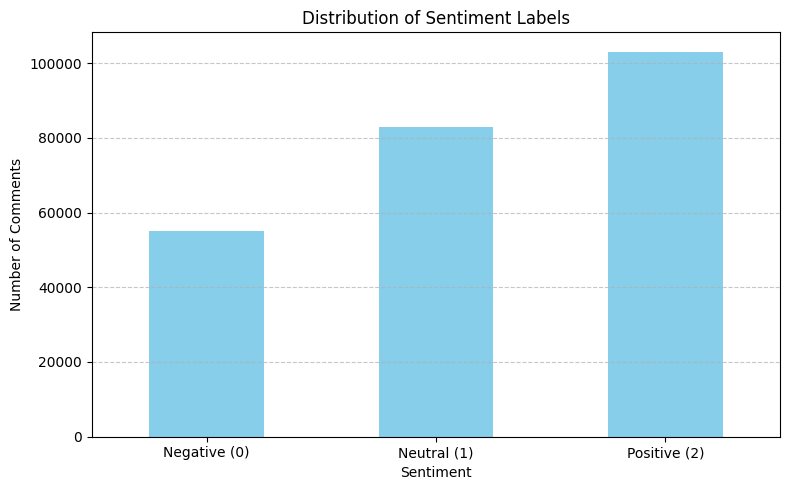

In [25]:
import matplotlib.pyplot as plt

# Count each sentiment class
sentiment_counts = sentiment_df['Sentiment'].value_counts().sort_index()

# Plot as bar chart
sentiment_counts.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title("Distribution of Sentiment Labels")
plt.xticks(ticks=[0,1,2], labels=['Negative (0)', 'Neutral (1)', 'Positive (2)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [26]:
average_sentiment = sentiment_df['Sentiment'].mean()
print("Average Sentiment Score:", average_sentiment)


Average Sentiment Score: 1.1988222853469903


In [ ]:
import matplotlib.pyplot as plt

# Drop rows with missing comments
sentiment_df_clean = sentiment_df.dropna(subset=['Comment'])

# Calculate average sentiment (though all sentiments are 0,1,2, the mean = label itself)
avg_sentiment = sentiment_df_clean.groupby('Sentiment').size()

# Plot the count of comments per sentiment
avg_sentiment.plot(kind='bar', figsize=(8,5), color='purple')

# Labeling the chart
plt.xlabel("Sentiment Labels")
plt.ylabel("Number of Comments")
plt.title("COMMENT COUNT PER SENTIMENT")
plt.xticks(ticks=[0,1,2], labels=['Negative (0)', 'Neutral (1)', 'Positive (2)'], rotation=0)
plt.yticks(range(0, max(avg_sentiment)+1, 5))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['Selling Price'],df['Original Price'],color='#28B463',alpha=0.5)
plt.xlabel("Selling Price")
plt.ylabel("Original Price")
plt.show()

In [ ]:
brand_distribution=df['Brands'].value_counts()
brand_distribution

In [ ]:
plt.figure(figsize=(15,8))
plt.pie(brand_distribution,autopct='%1.1f%%',labeldistance=1.2,pctdistance=0.85, colors=sns.color_palette('Set3', len(brand_distribution)))
plt.title("DISTRIBUTION OF SMARTPHONES BY BRANDS")
plt.legend(brand_distribution.index,title="Brands",bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()


In [ ]:
df['Discount Price']=df['Original Price']-df['Discount']
discount_df=df.groupby('Brands')[['Discount Price','Original Price']].mean()
discount_df=discount_df.reset_index()
discount_df

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
bar_width=0.35
index=range(len(discount_df))
ax.bar(index,discount_df['Original Price'],bar_width,label='Original Price',color='blue')
ax.bar([i+bar_width for i in index],discount_df['Discount Price'],bar_width,label='Discount Price',color='red')
plt.xlabel("Brands")
plt.ylabel("Price")
plt.title('Original vs Discounted Prices')
plt.xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(discount_df['Brands'])
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
df['Memory']=df['Memory'].str.replace(r'\D','',regex=True).astype(int)

In [ ]:
df['Storage']=df['Storage'].str.replace(r'\D','',regex=True).astype(int)

In [ ]:
df.head(5)

In [ ]:
corr_matrix=df[['Selling Price', 'Original Price', 'Memory', 'Storage', 'Rating']].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
sns.regplot(x='discount percentage', y='Rating', data=df, scatter_kws={'color': 'red'})
plt.title('Discount Impact on Rating')
plt.show()


In [ ]:
sns.pairplot(df,vars=['Memory','Storage','Rating','discount percentage'],hue='Brands',palette='coolwarm')
plt.suptitle("Feature Relationships by Brands",y=1.02)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
top_brands = df['Brands'].value_counts().head(3).index
for brand in top_brands:
    sns.kdeplot(df[df['Brands'] == brand]['Selling Price'], label=brand, fill=True, alpha=0.3)

plt.title('Selling Price Distribution Across Top Brands')
plt.xlabel('Selling Price')
plt.ylabel('Density')
plt.legend(title='Brands')
plt.show()


In [ ]:
new_df=df.copy()
new_df.head(5)

In [ ]:
new_df['Brands']=pd.factorize(new_df['Brands'])[0]
new_df.head(5)

In [ ]:
x=new_df[['Brands','Memory','Storage','Rating']]
y=new_df['Selling Price']

In [ ]:
print(new_df.dtypes)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mse

In [ ]:
max(df['Rating'])

In [ ]:
threshold=3.5
new_df['Rating Category']=new_df['Rating'].apply(lambda x:1 if(x>=threshold) else 0)

In [ ]:
new_df.head(5)

In [ ]:
new_df.dtypes

In [ ]:
x=new_df[['Memory','Storage','Selling Price','Discount']]
y=new_df['Rating Category']
x,y